# 맷플롯립의 고급기능

In [10]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic', size=11)
plt.rcParams['figure.dpi'] = 100

In [2]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:01<00:00, 44.0MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


# 하나의 피겨에 여러 개의 선 그래프 그리기

In [24]:
# 상위 30위 출판사 목록 고르기
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs

문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: 출판사, dtype: int64

In [4]:
# 상위 30위에 해당하는 출판사, 발행년도, 대출건수 만 추출
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [6]:
# 출판사, 발행년도 기준으로 대출건수 합 구하기. 출판사마다 연도별 대출건수를 나타내기 위함.
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [7]:
# 인덱스를 초기화하고 황금가지 출판사 데이터 확인
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [8]:
# 선 그래프 2개 그리기
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

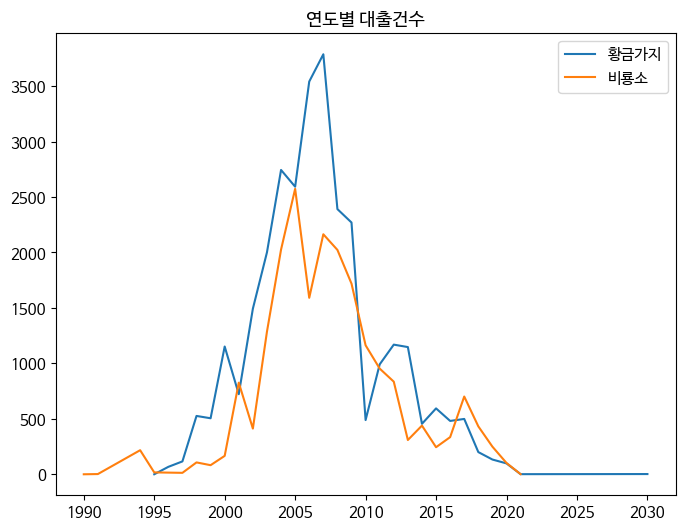

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
plt.show()

In [20]:
for pub in top30_pubs.index[:5]:
    print(pub)

문학동네
민음사
김영사
웅진씽크빅
시공사


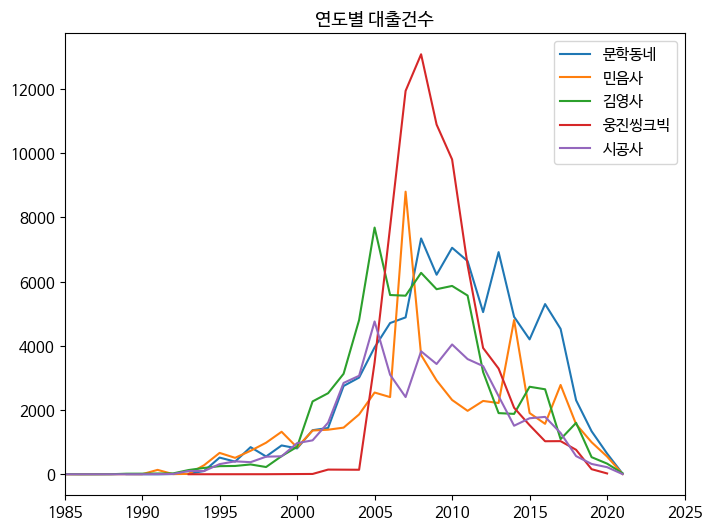

In [17]:
# 선그래프 5개 그리기
fig, ax = plt.subplots(figsize=(8, 6))

for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)

ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

# 스택 영역 그래프

## 1. pivot_table(): 각 '발행년도' 열의 값을 열로 바꾸기

In [25]:
# 하나의 열을 2차원 배열로 바꾸기(피벗테이블)
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

열이 다단으로 구성되어 있다. 첫번째 열을 보면 ('대출건수', 1947)이다.

In [26]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

## 2. '발행년도' 열을 리스트 형태로 바꾸기

In [27]:
top10_pubs = top30_pubs.index[:10]
# ('대출건수', 1947)로 되어있는 열 이름 중에 두 번째 항목만 가져오기
year_cols = ns_book10.columns.get_level_values(1)

## 3. stackplot(): 스택 영역 그래프 그리기

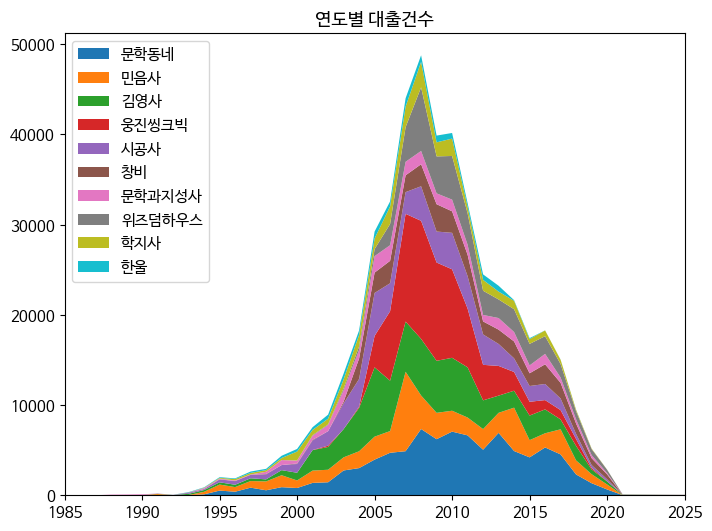

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

fillna() 사용해서 그래프가 정상적으로 그려지도록.
pivot_table()에서 fill_value=0 으로 지정하면 피벗테이블을 만들 때 미리 누락된 값을 0으로 채울 수 있다.

# 하나의 피겨에 여러 개의 막대 그래프 그리기

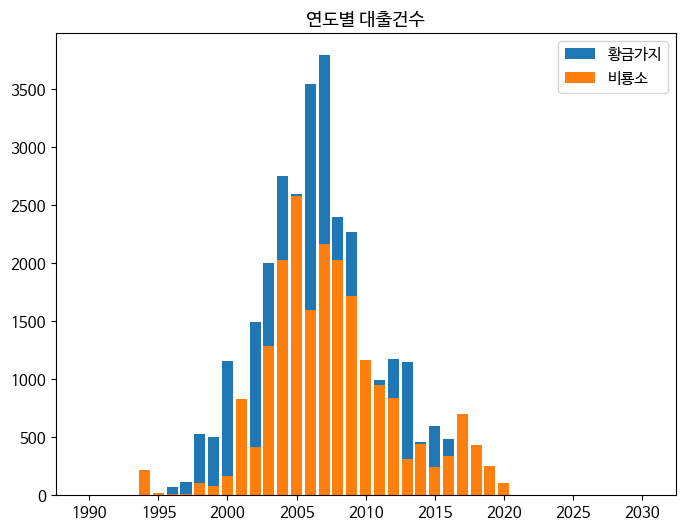

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

막대 그래프는 bar()를 연이어 호출하면 먼저 그린 막대를 덮어쓰게 된다.

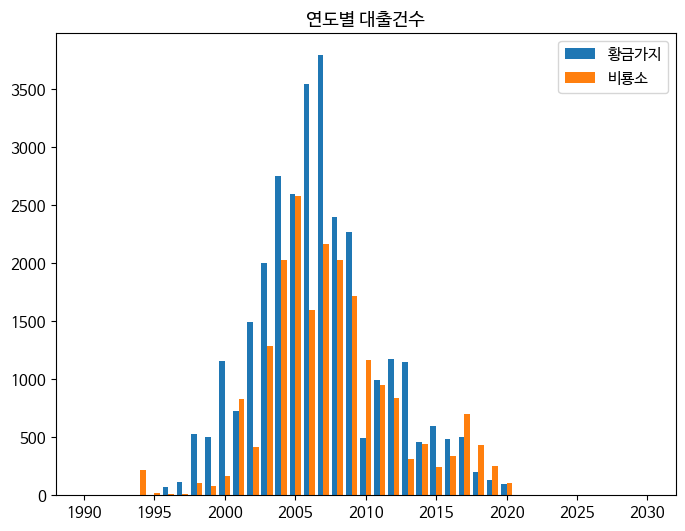

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

### 스택 막대 그래프

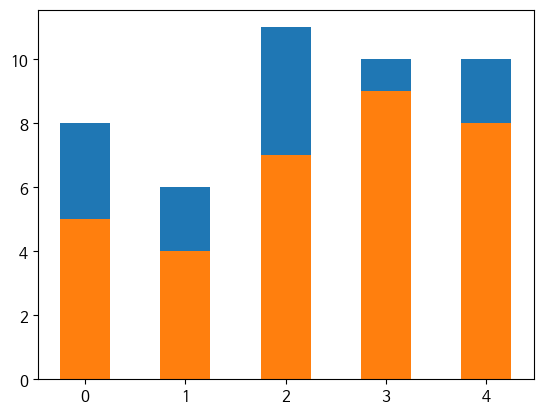

In [31]:
height1 = [5,4,7,9,8]
height2 = [3,2,4,1,2]

height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

### 데이터값 누적하여 그리기

In [32]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [33]:
# cumsum(): 행을 따라 값을 누적함.
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [34]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

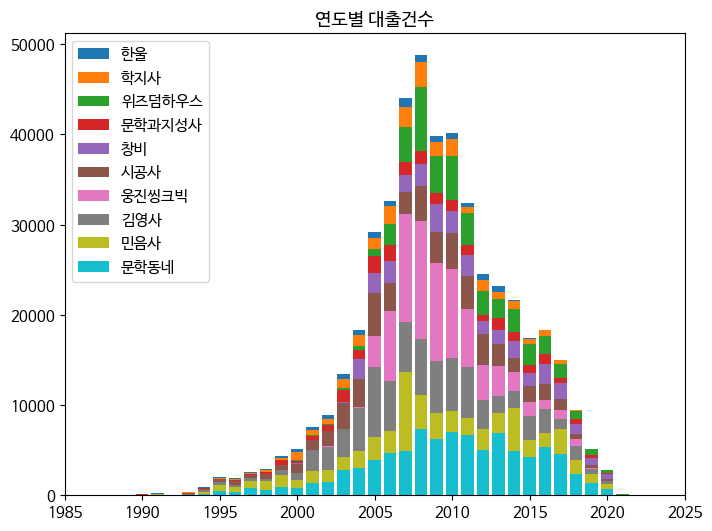

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in reversed(range(len(ns_book12))): # 가장 큰 막대부터 그려야 하므로 누적 합계가 큰 마지막 출판사부터 그린다.
    bar = ns_book12.iloc[i] # 행 추출
    label = ns_book12.index[i]
    ax.bar(year_cols, bar, label=label)

ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

# 원 그래프 그리기

In [40]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

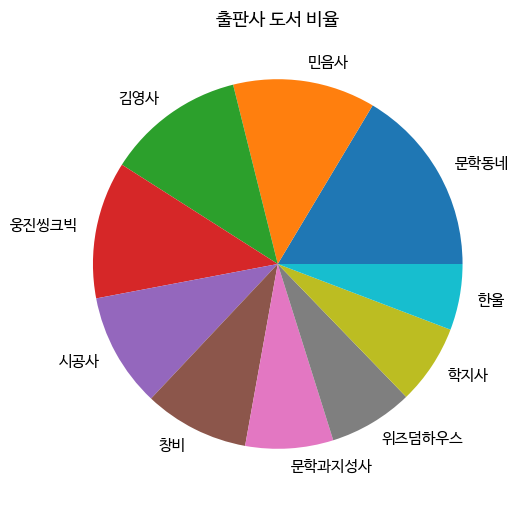

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

크기 순서대로 이미 정렬이 되어있는 데이터는 부채꼴의 순서대로 크기가 커진다.
크기 순으로 정렬되어 있지 않은 데이터를 사용했다면 어떤 부채꼴이 더 큰지 확실하게 말하기 어렵다.

### 비율 표시하고 부채꼴 강조하기

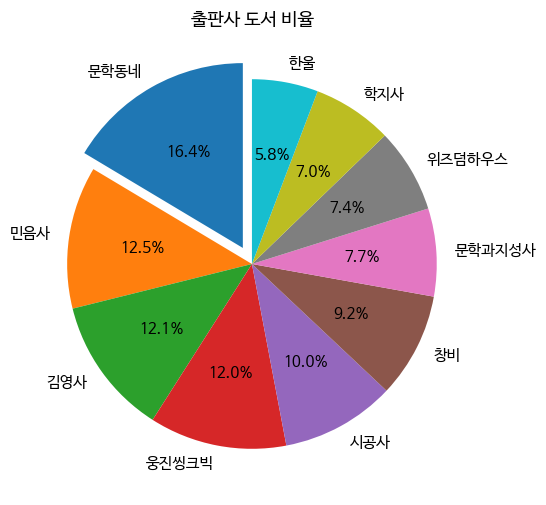

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
# 90도: 12시 방향부터 시작.
# 첫번째만 떼어내고 나머지는 붙여서.
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

# 여러 종류의 그래프가 있는 서브플롯 그리기

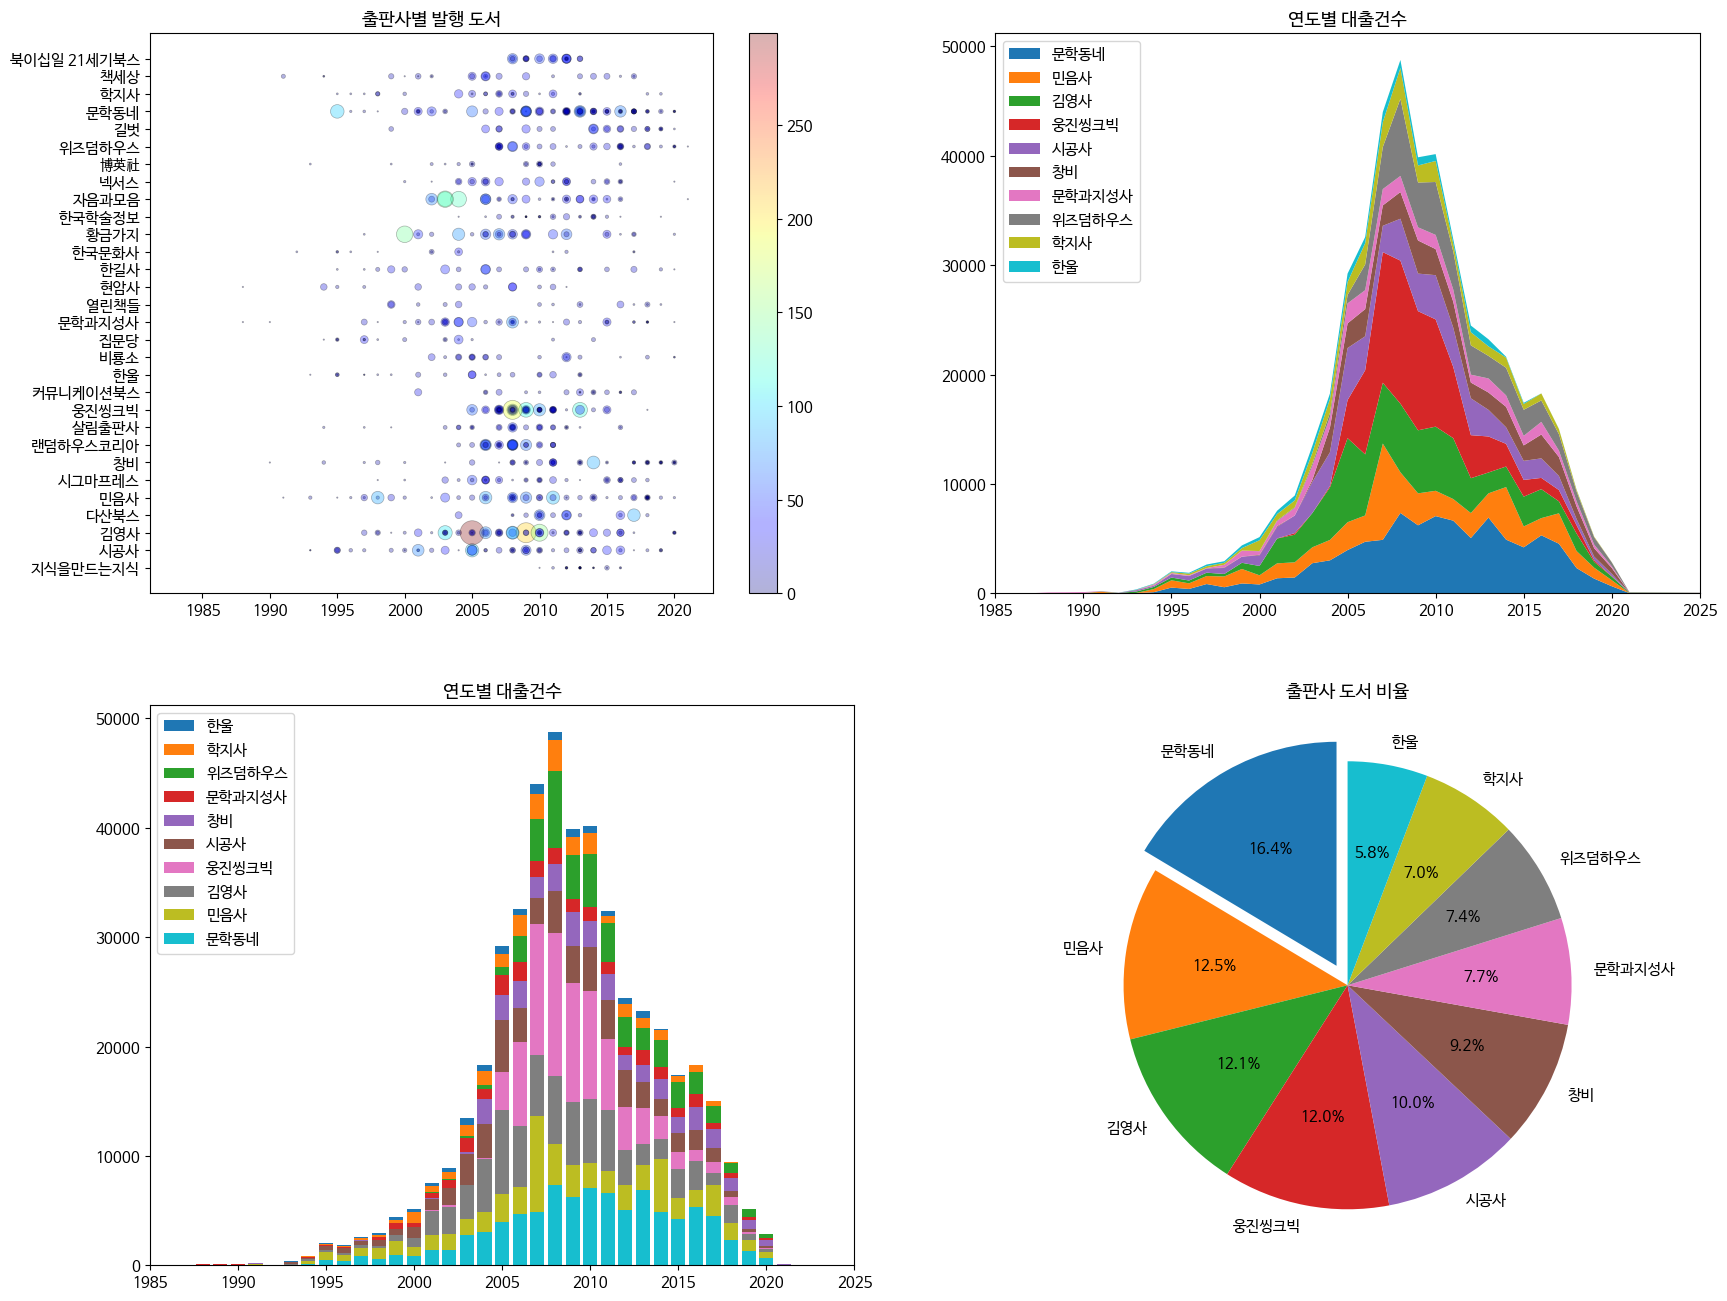

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0,0].scatter(ns_book8['발행년도'], ns_book8['출판사'],
                       linewidths=0.5, edgecolors='k', alpha=0.3,
                       s=ns_book8['대출건수'], c=ns_book8['대출건수'],
                       cmap='jet')
axes[0,0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0,0])

# 스택 영역 그래프
axes[0,1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0),
                    labels=top10_pubs)
axes[0,1].set_title('연도별 대출건수')
axes[0,1].legend(loc='upper left')
axes[0,1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i] # 행 추출
    label = ns_book12.index[i] # 출판사 이름 추출
    axes[1,0].bar(year_cols, bar, label=label)
axes[1,0].set_title('연도별 대출건수')
axes[1,0].legend(loc='upper left')
axes[1,0].set_xlim(1985, 2025)

# 원 그래프
axes[1,1].pie(data, labels=labels, startangle=90,
              autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1,1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()